# SpotiPY: A Visual Presentation of My Spotify Use from February - April 2024

The present project has been conducted as an exam for PSY-3035 Programming and Data Visualization for Researchers. 
The exam and data has been published as an open repository on Github. The repository can be found at the following link: https://github.com/maribergsjordet/SpotiPY.

The project investigated my Spotify use from February to April 2024. The data includes artists, songs, date and time of day songs have been played, and the length of each song (in milliseconds). When applying for personal data from Spotify, you are provided with several files with months grouped together. Due to the large amount of data I was provided with for my personal Spotify data, I chose to only focus on the data from February to April 2024 (the first period of Spotify Wrapped 2024). 

The following four hypotheses were assessed:

H1: There are more female artists in my top 10 most played artists in February-April 2024 than male artists.

H2: At least one of my top 6 most played songs in February-April 2024 is by my most played artist.

H3: My most played artist remains constant across the three months. 

H4: I listen more to music in the morning than in the evening. 

## Preparing and organizing the data

In [11]:
# Import relevant packages (responds to criteria 2.4 in the ruberic)
import json # The package allows me to open and work with my JSON data
import pandas as pd # This package allows me to use the Pandas library (e.g., to make rows and columns)
import matplotlib.pyplot as plt # This package provides me with vizualisation tools to investiage my data (e.g., through bar charts)
import numpy as np # The package provides me with mathematical tools (e.g., to do calculations) on my large dataset 
from collections import Counter # The module makes it possible for me to count (in this case) the amount of times each artist was played

In [12]:
# Import Spotify data for February-April 2024
with open ('/Users/maribergsjordet/Documents/PSY-3035/SpotiPY/SpotiPY/Spotify Account Data/StreamingHistory_music_0.json', 'r', encoding='utf-8') as file:
# Load the JSON data
    data = json.load(file)

In [13]:
#Extract all artists into a list (without taking into account that the same artist has been played multiple times)
all_artists = [entry['artistName'] for entry in data]

#Count how many times each artist has been played
playcount=Counter(all_artists)

# Create a dataframe for artist and playcount
df1=pd.DataFrame.from_dict(playcount, orient='Index').reset_index()

# Rename columns to 'Artist' and 'Count'
df1=df1.rename(columns={'index':'Artist', 0:'Count'})

# Sort the DataFrame by the 'Count' column in descending order
df1 = df1.sort_values(by='Count', ascending=False)

# Select only my top 10 most played artists
top_10_artists = df1.head(10)

## Hypothesis 1

### There are more female artists in my top 10 most played artists in February-April 2024 than male artists.

To investigate the first hypothesis in my project, I decided to visualize the data by using a bar chart which shows the top 10 most played artists in my Spotify data. To increase readibility of the chart, I chose to present them in descending order to also get a better view of which artists were the most played in this period.

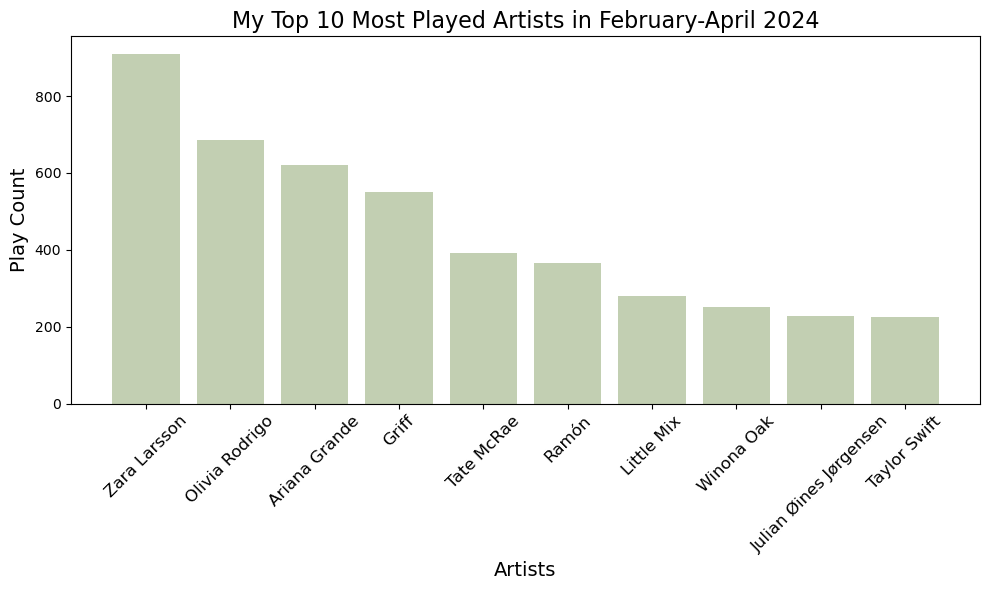

In [14]:
# Extract artist names and play counts
artists = top_10_artists['Artist']
play_counts = top_10_artists['Count']

#Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(artists, play_counts, color='#C2CFB2')

# Customize apperance of plot
plt.xlabel("Artists", fontsize=14) # Add label to x-axis
plt.ylabel("Play Count", fontsize=14) # Add label to y-axis
plt.title("My Top 10 Most Played Artists in February-April 2024", fontsize=16) # Add title to the chart
plt.xticks(rotation=45, fontsize=12)  # Rotate artist names for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping

# Show the chart
plt.show()

From the bar chart above, we can see my top 10 most played artists in decending order. Out of the 10 artists, 8 are female and 2 are male (i.e., Ramón and Julian Øines Jørgensen), supporting my hypothesis. 

The readibility of the bar chart could have been increased by differentiating the gender of the artist by colour (e.g., females in green and males in orange). In order to do so, I would have to manually assign each artist to one of the two groups as this information was not provided in the dataset.

## Hypothesis 2
### At least one of my top 6 most played songs in February-April 2024 is by my most played artist.

To investigate this hypothesis, I chose to make a pie chart as this would nicely illustrate my most played songs in this period (incl. percentage for each song). Due to the large amount of songs that have been played during this period, I only included the top 6 songs in my hypothesis. 

From the previous hypothesis and bar chart, we can see that my most played artist is Zara Larsson. Thus, in the pie chart we will have to see if at least one of my top 6 songs is by Zara Larsson.

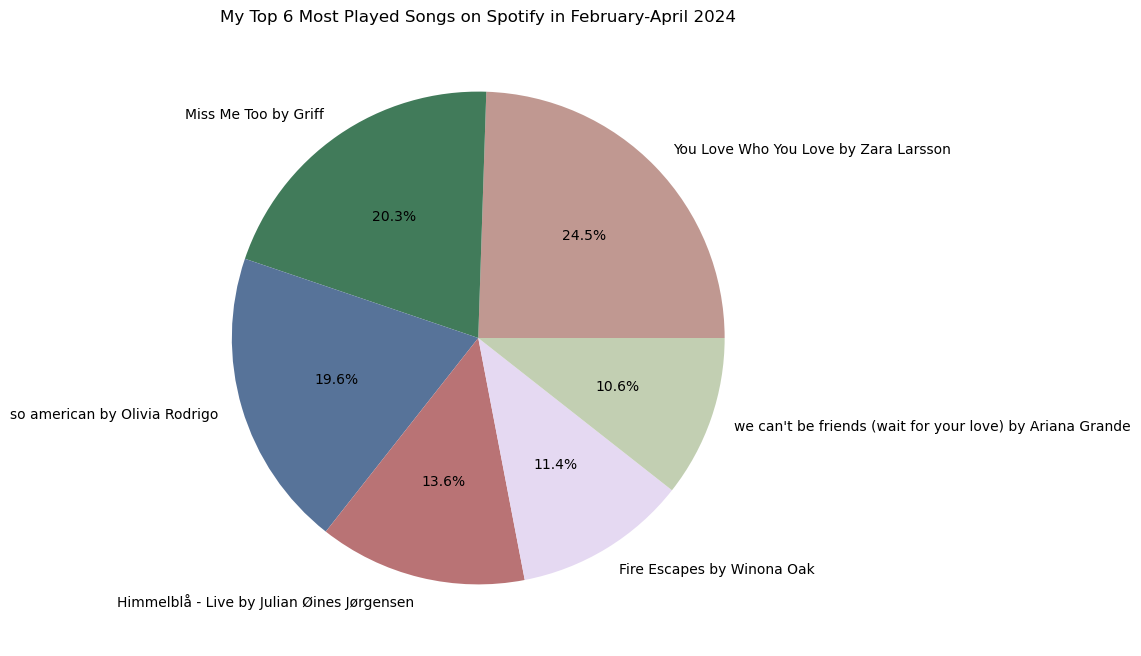

In [15]:
# Make new dataframe as the previous did not include name of song
data = pd.DataFrame(data)

# Combine artist and song into a single column for labeling
data['song_label'] = data['trackName'] + " by " + data['artistName']

# Count the number of plays for each song
song_counts = data['song_label'].value_counts()

# Find the top 6 most played songs
top_6_songs = song_counts.head(6)

# Prepare data for the pie chart
labels = top_6_songs.index  # Extract song names with artist
plays = top_6_songs.values  # Extract play counts

# Customize colors for the chart using hex codes
colors = ['#C09891', '#417B5A', '#577399', '#B97375', '#E5D9F2', '#C2CFB2']

# Create the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(
    plays,
    labels=labels,      
    autopct='%1.1f%%',  # Show percentages for each song
    colors=colors       # Use custom colors
)

# Add a title
plt.title("My Top 6 Most Played Songs on Spotify in February-April 2024")

# Show the chart
plt.show()

From the pie chart, we can see that one of the songs in my top 6 most played songs is by Zara Larsson (my most played artist in February-April 2024). Thus, my hypothesis is supported.

## Hypothesis 3
### My most played artist remains constant across the three months.

To investigate this hypothesis, I decided to make a filter for my top 3 most played artist in this period to see whether Zara Larsson is consistently above the second and third most played artists in February-April 2024. I will visualize the results through a line plot with one line for each of the top three artists. From the first graph I made (the bar chart), we saw that Olivia Rodrigo and Ariana Grande were my second and third most played artists. 

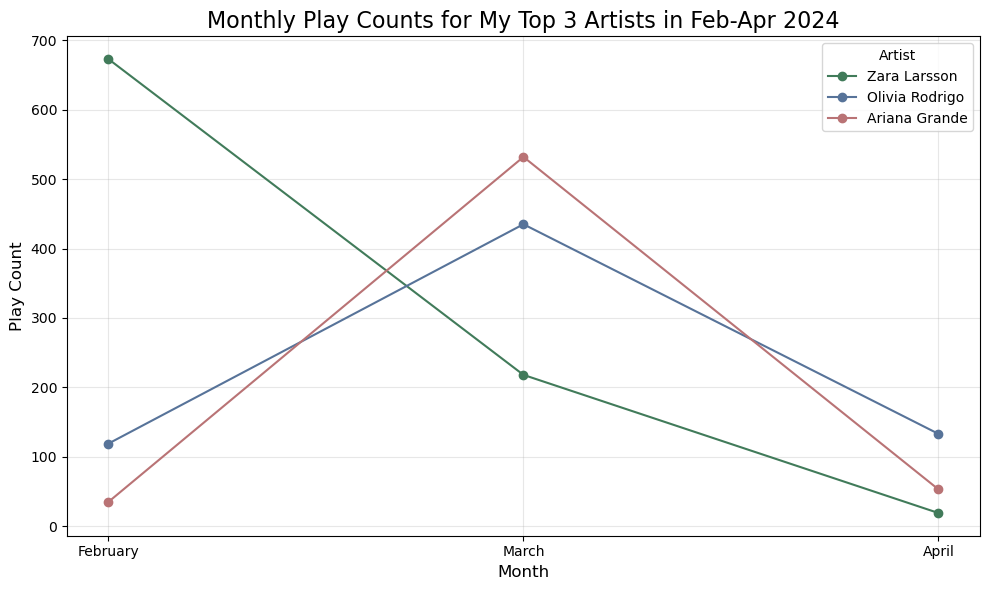

In [16]:
# Convert 'endTime' to datetime
data['endTime'] = pd.to_datetime(data['endTime'])
data_2024 = data[(data['endTime'].dt.year == 2024) & (data['endTime'].dt.month.isin([2, 3, 4]))]

# Filter for my top 3 most played artists
top_artists = ['Zara Larsson', 'Olivia Rodrigo', 'Ariana Grande']
data_top_artists = data_2024[data_2024['artistName'].isin(top_artists)].copy()  # Used .copy() to avoid a warning that came up

# Extract the month from 'endTime'
data_top_artists['month'] = data_top_artists['endTime'].dt.month

# Group data by artist and month
play_counts = data_top_artists.groupby(['artistName', 'month']).size().reset_index(name='play_count')

# Pivot the data for plotting (to make it look cleaner)
pivot_data = play_counts.pivot(index='month', columns='artistName', values='play_count').fillna(0)

# Define custom colors for each artist (using hex codes)
custom_colors = {
    'Zara Larsson': '#417B5A',  
    'Olivia Rodrigo': '#577399', 
    'Ariana Grande': '#B97375'
}

# Create a line plot
plt.figure(figsize=(10, 6))
for artist in top_artists:
    plt.plot(
        pivot_data.index, 
        pivot_data[artist], 
        marker='o', # Add a circle marker to data points to improve readibility
        label=artist, # Add label to the data series
        color=custom_colors[artist]  # Use the customized color for each artist
    )

# Customize the plot
plt.title('Monthly Play Counts for My Top 3 Artists in Feb-Apr 2024', fontsize=16) # Add title to plot
plt.xlabel('Month', fontsize=12) # Add label to x-axis
plt.ylabel('Play Count', fontsize=12) # Add label to y-axis
plt.xticks(ticks=[2, 3, 4], labels=['February', 'March', 'April'], fontsize=10) # Label ticks according to the month
plt.legend(title='Artist', fontsize=10) # Add title to the plot legend which summarizes each artist and their designated line
plt.grid(alpha=0.3) # Add grid lines to the plot to increase readibility
plt.tight_layout() # Prevent overlapping and make plot look cleaner

# Show the plot
plt.show()

The line plot shows that Zara Larsson had the most amount of plays in February with quite a drastic decrease in March. Interestingly, both the second (Olivia Rodrigo) and third (Ariana Grande) most played artists overall in February-April 2024 were played more than Zara Larsson in both March and April. In conclusion, the plot suggests that my hypothesis was not supported (i.e., Zara Larsson was not my most played artist across all three months). 

## Hypothesis 4
### I listen more to music in the morning than in the evening.

To investigate the fourth and final hypothesis, I decided to make a bar chart. To better the readibility of the chart, I decided to make three-hour intervals instead of showing the exact time songs have been played. I also think it is more interesting to look at longer periods of the day than for each hour of the day. 

In [17]:
# Extract hour from 'endTime'
data['hour_of_day'] = data['endTime'].dt.hour

# Define time intervals (bins)
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
labels = ['00:00-03:00', '03:00-06:00', '06:00-09:00', '09:00-12:00', 
          '12:00-15:00', '15:00-18:00', '18:00-21:00', '21:00-00:00']

# Create a new column for the time interval
data['time_interval'] = pd.cut(data['hour_of_day'], bins=bins, labels=labels, right=False)

# Count how many times each time interval occurs
interval_counts = data['time_interval'].value_counts().sort_index()

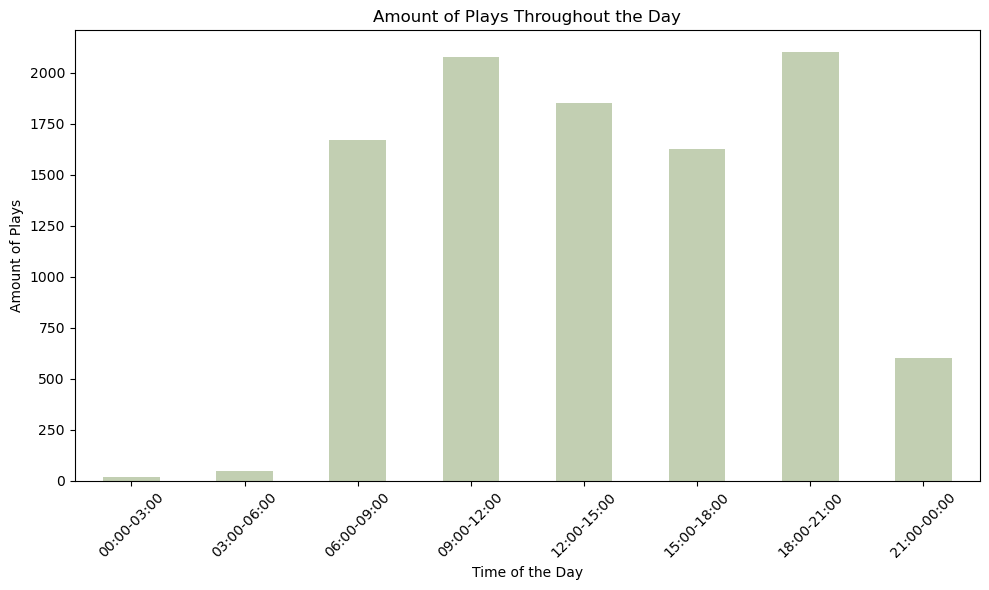

In [18]:
# Plotting the result
plt.figure(figsize=(10, 6)) # Set the figure size
interval_counts.plot(kind='bar', color='#C2CFB2') # Make plot for intervals
plt.title('Amount of Plays Throughout the Day') # Add title
plt.xlabel('Time of the Day') # Add label to x-axis
plt.ylabel('Amount of Plays') # Add label to y-axis
plt.xticks(rotation=45) # Rotate name of intervals for better readibility
plt.tight_layout() # Adjust layout to prevent overlapping

# Show the plot
plt.show()

From the bar chart we can see that the amount of plays remains quite consistent throughout the day (if we disregard 00:00-06:00 when I am asleep). The amount of plays in the morning (09-12) and in the evening (18-21) are almost exactly the same. In conclusion, my hypothesis that I listen more to music in the morning than in the evening does not hold. 